<a href="https://colab.research.google.com/github/dxxli163/-/blob/master/Up_load_from_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3
%pip install -qr requirements.txt  # install

import torch
from yolov3 import utils
display = utils.notebook_init()  # checks

YOLOv3 🚀 v9.6.0-17-g3508a98 torch 1.11.0+cu113 CPU


Setup complete ✅


In [ ]:
import torch


In [4]:
b=torch.as_tensor([1,2,3,4,5])
print(4)
print(5)

5


detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-17-g3508a98 torch 1.11.0+cu113 CPU

100% 119M/119M [00:01<00:00, 74.8MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, Done. (2.235s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (1.789s)
Speed: 2.9ms pre-process, 2012.2ms inference, 7.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


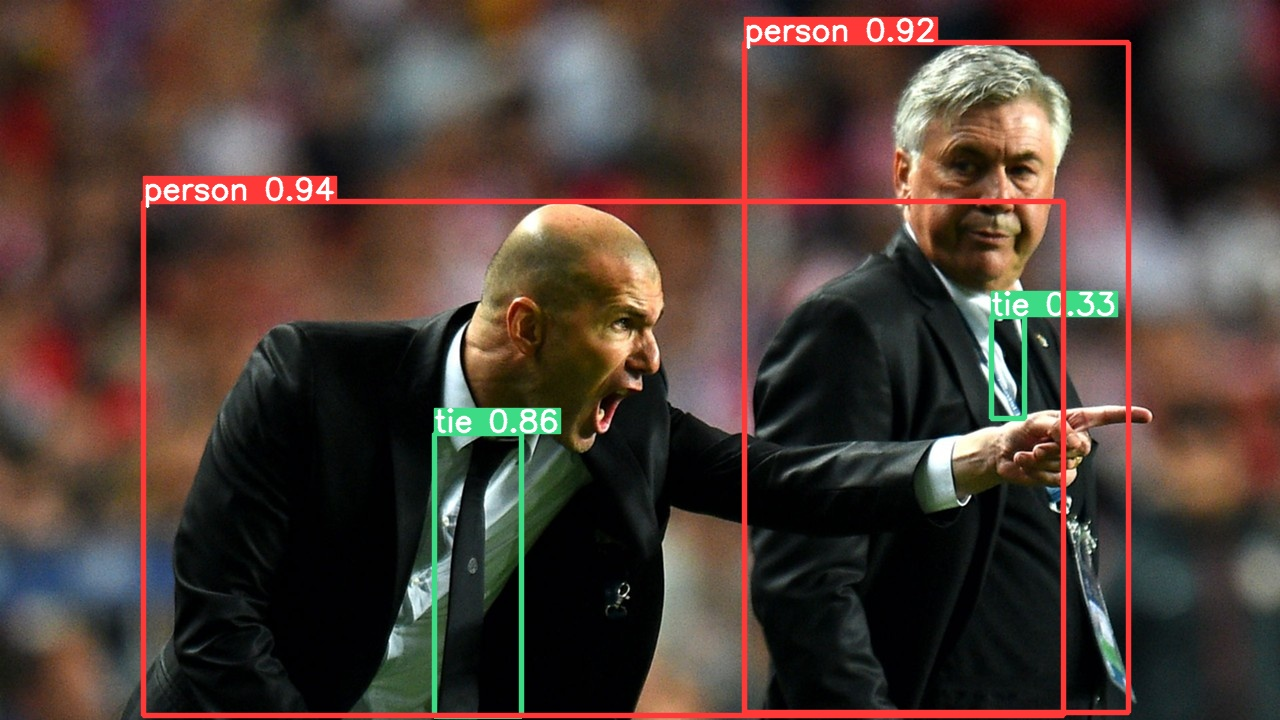

In [ ]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

# New Section

In [ ]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source '/buses-to-test.jpg'


detect: weights=['yolov3.pt'], source=/buses-to-test.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-17-g3508a98 torch 1.11.0+cu113 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /buses-to-test.jpg: 448x640 20 persons, 1 bicycle, 1 bus, 7 traffic lights, 2 backpacks, 4 handbags, Done. (2.025s)
Speed: 2.2ms pre-process, 2024.8ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


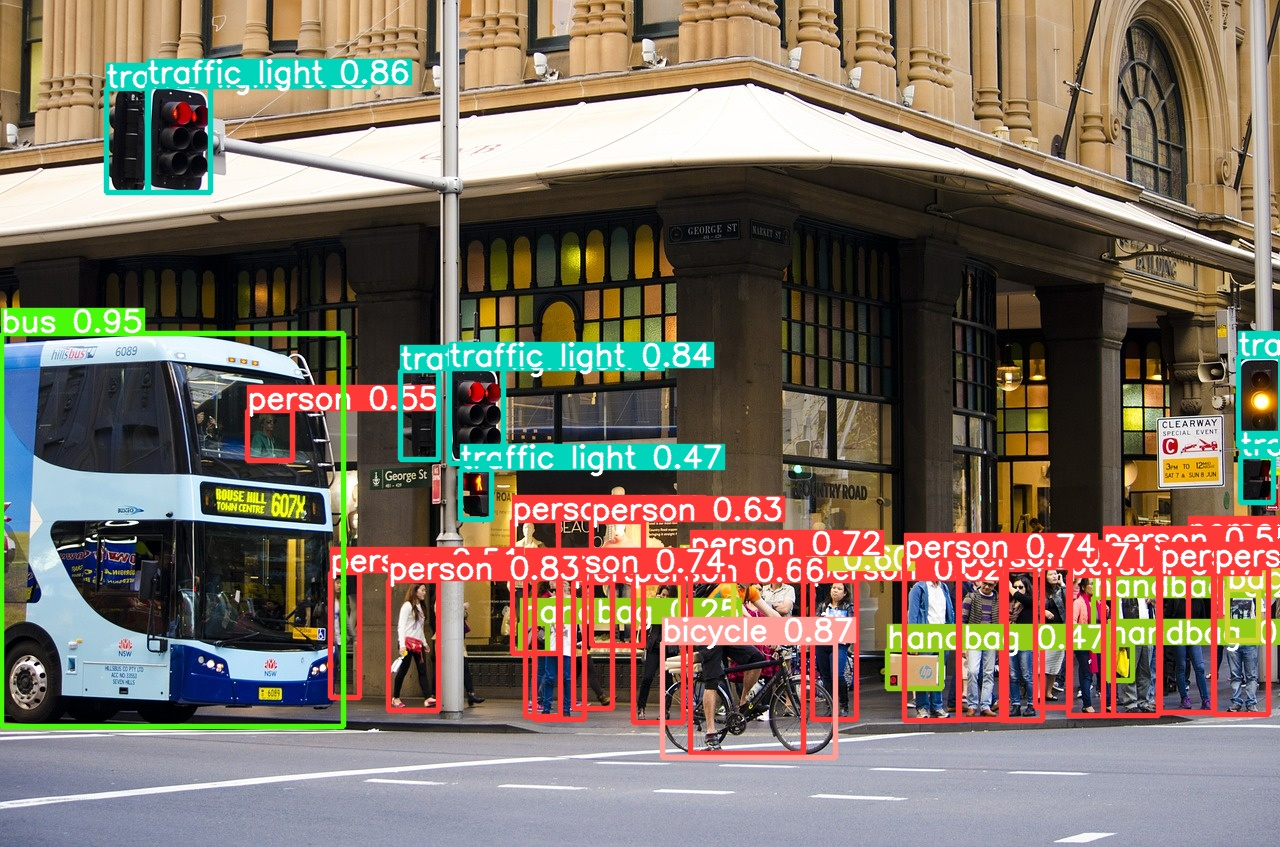

In [ ]:
display.Image(filename='runs/detect/exp3/buses-to-test.jpg', width=600)

In [ ]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source '/dog.jpg'


detect: weights=['yolov3.pt'], source=/dog.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-17-g3508a98 torch 1.11.0+cu113 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /dog.jpg: 480x640 1 bicycle, 1 truck, 1 dog, 1 potted plant, Done. (2.211s)
Speed: 3.6ms pre-process, 2210.9ms inference, 13.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


FileNotFoundError: ignored

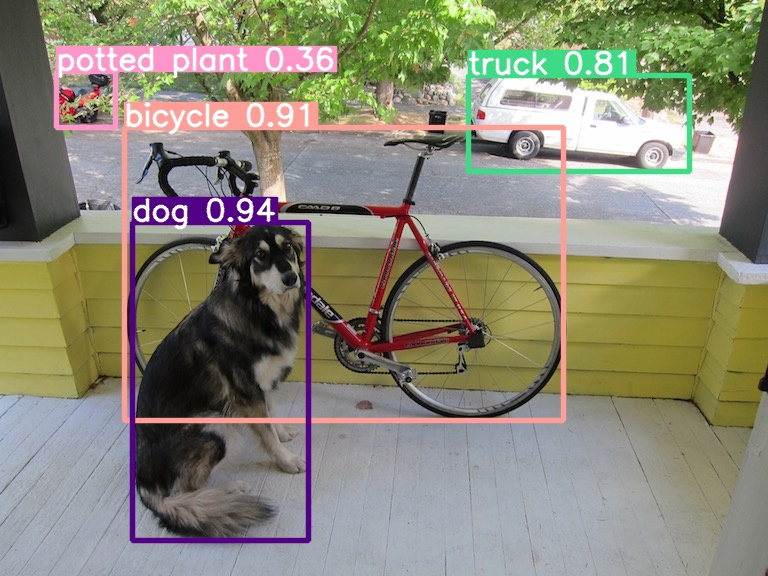

In [ ]:
display.Image(filename='runs/detect/exp2/dog.jpg', width=600)

In [ ]:
import cv2

In [ ]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source '/dog.jpg'

增加本地摄像机的显示功能.验证可以使用摄像头，速度很快，无卡顿（5.25）。

In [ ]:
'''
## Camera Capture
Using a webcam to capture images for processing on the runtime.
Source: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi
'''

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  print(filename)  #杜加
  return filename

In [ ]:
from IPython.display import Image
try:
 # %debug print(1)
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # !python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source '/content/photo.jpg'
  # display.Image(filename='runs/detect/exp2/dog.jpg', width=600)
  
  # Show the image which was just taken.
  display(Image(filename))  
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

'NoneType' object has no attribute 'split'
